#### TOBIG'S 14기 정규세션 4주차 SVM 
### ASSIGNMENT2
---

 Anomaly detection 데이터셋을 SVM을 이용해서 판별하는 과제로 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!

 데이터 분포 : True : 0.17프로 나머지 다 False, 
 
 Row가 약 28만행이기 때문에 data training 시간이 오래 걸립니다.그래도 자고 일어나면 트레이닝 되어있기는 하는 정도니 여유롭게 과제를 시작해주세요 :)

 아직 익숙하지 않으신 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 과제를 반려하지는 않겠습니다!

# DATA

주어진 데이터를 확인하고 기본적으로 사용할 패키지들을 import한다. (추후 필요한 패키지들은 차차 import하기로 하자)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


데이터는 앞서 출제자가 언급했던 것처럼 굉장히 imbalance하면서 양이 많다. 간단한 확인을 위해 EDA를 진행했고,class별 수 및 비율을 도출해본 결과는 아래와 같이 나왔다.

0    284314
1       492
Name: Class, dtype: int64
0    99.827251
1     0.172749
Name: Class, dtype: float64


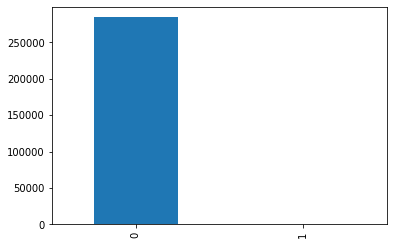

In [22]:
data.Class.value_counts().plot(kind = 'bar')
print(data.Class.value_counts())
print(data.Class.value_counts(normalize = True)*100)

In [23]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

구체적 분석을 위해 X와 y로 데이터를 나누고, train과 test로 split을 진행한다.

In [25]:
X = data.iloc[:,:30]
y = data.iloc[:,-1]
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284801    0
284802    0
284803    0
284804    0
284805    0
Name: Class, Length: 284806, dtype: int64


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

이런 imbalance한 데이터를 처리하는 방법은 크게 두 가지가 존재한다. 하나는 weight를 부가함으로써 적은 비율의 데이터를 oversampling하는 것이다. imbalance한 데이터의 문제는 너무 적다는 점이다. 이를 개선하기 위해 비율이 적은 부분에 가중치를 부여해 sampling을 진행함으로서, 두 class의 비율을 어느 정도 맞춘다는 것이다. 그러나 이 방법의 단점은 시간이 엄청 오래걸린다는 것이다. 당장 28만행의 데이터도 학습을 진행하는데 오랜 시간이 걸렸다. 이 것보다 데이터가 많아진다면 시간이 오래 걸린다는 것은 자명한 사실이다.

반면 다른 방법으로는 undersampling을 진행하는 것이다. 위의 oversampling이 적은 데이터를 많은 데이터의 수에 맞추는 방식이라면, 이 방법은 많은 데이터를 적은 데이터의 수에 맞추는 것이다. 당연히 연산에 걸리는 시간은 줄어들 것이다. 하지만 이렇게 학습을 진행하면 날라가는 유용한 데이터들이 많다는 것을 염두해둬야 한다. 

두 가지 방법을 모두 진행하고 싶으나, 시간적인 문제와 컴퓨터 성능의 문제로...undersampling만 진행하기로 했다.

In [ ]:
#https://m.blog.naver.com/PostView.nhn?blogId=wjddudwo209&logNo=221448123026&proxyReferer=https:%2F%2Fwww.google.com%2F

undersampling에 필요한 패키지는 아래와 같이 설치한다. 설치 후 kernel을 꼭 다시 시작시켜야 한다.

In [ ]:
!pip install imblearn

In [18]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jj950\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from imblearn.under_sampling import *

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213604, 30), (71202, 30), (213604,), (71202,))

우선 위와 같이 train과 test로 구분을 해준다. 그리고 아래의 과정을 통해 undersampling을 진행한다.

In [28]:
rus = RandomUnderSampler(random_state = 0)

In [29]:
X_resampled,y_resampled = rus.fit_resample(X_train,y_train)

In [30]:
X_resampled.shape,X_test.shape,y_resampled.shape,y_test.shape

((742, 30), (71202, 30), (742,), (71202,))

In [32]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

확실히 resample된 데이터의 수가 현저하게 적은 것을 확인할 수 있다. 그리고 이 resample을 svc 모델에 적용시킨다.

In [33]:
svc_rus = SVC(kernel = 'linear', C = 100)
svc_rus.fit(X_resampled, y_resampled)

SVC(C=100, kernel='linear')

In [34]:
y_predict_rus = svc_rus.predict(X_test)

In [36]:
from sklearn.metrics import*
confusion_matrix(y_test,y_predict_rus)

array([[68554,  2527],
       [    7,   114]], dtype=int64)

예측값을 통해 confusion matrix를 만들어보고 아래와 같이 각 값들을 구한다. 아래의 값은 굉장히 유의미하다. 우선 recall이 0.94로 굉장히 높은 것을 확인할 수 있다. 반면에 precision과 f1 score는 굉장히 처참한 것을 확인할 수 있다.

하지만 이런 imbalance한 데이터의 경우, recall 값이 굉장히 중요하다. 사기 데이터의 경우, 한 번 발생하면 큰 피해를 입기 때문에 발생했을 때 정확하게 발견하는 것이 중요하다. 실제 사기 행위를 제대로 적발하지 못한다면 그것은 가장 잘못된 모델이 될 것이다. 결국 tp를 늘리고 fn을 줄이는 것이 중요한데, 이 두 값으로 만들어진 지표가 recall 이기 때문에 recall값이 큰 것이 가장 중요하다.(recall = tp/(tp+fn))

In [38]:
print(classification_report(y_test,y_predict_rus))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71081
           1       0.04      0.94      0.08       121

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.96      0.98     71202



더 정확한 모델을 만들기 위해 gridsearch를 진행했다.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import rbf_kernel 

In [65]:
grid_params = {
    'kernel':['linear','rbf'],
    'gamma':[0.01,0.1,1,10, 100],
    'C':[0.01,0.1,1,10,100]
}

In [77]:
gs = GridSearchCV(SVC(),grid_params,cv = 10, scoring = 'accuracy', verbose = 3)

In [78]:
gs.fit(X_resampled,y_resampled)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.893, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.960, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.865, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.932, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.932, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.01, gamma=0.01, kernel=linear, score=0.932, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.613, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.689, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.811, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.730, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.838, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.797, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.703, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   29.6s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=3)

In [79]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [80]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.947


In [81]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 0.970


그리드 서치로 찾은 parameter값은 위와 같다. 일반적으로 데이터가 많은 경우 linear가 아닌 rbf 모델이 더 적합한데 의외의 결과가 도출됐다.

구한 파라미터를 바탕으로 예측값을 구해봤다.

In [82]:
svc_final = SVC(kernel = 'linear', C = 1, gamma = 0.01)
svc_final.fit(X_resampled,y_resampled)

SVC(C=1, gamma=0.01, kernel='linear')

In [83]:
y_predict_svc_final = svc_final.predict(X_test)
confusion_matrix(y_test,y_predict_svc_final)

array([[68946,  2135],
       [   11,   110]], dtype=int64)

In [84]:
print(classification_report(y_test,y_predict_svc_final))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71081
           1       0.05      0.91      0.09       121

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



역시 위와 달리 recall 값이 조금 떨어진 것을 확인할 수 있다. 동시에 f1 score와 precision 값이 오른 것도 볼 수 있다. sample의 수가 적어지면서 linear를 최적의 파라미터로 구한 것으로 보인다. 이로 인해 recall 값이 떨어진 것으로 조심스럽게 추측해본다.

In [ ]:
#https://m.blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431933811&proxyReferer=https:%2F%2Fwww.google.com%2F  
#https://teddylee777.github.io/scikit-learn/grid-search-%EB%A1%9C-hyperparameter%EC%B5%9C%EC%A0%81%ED%99%94